In [1]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [17]:
df = pd.read_csv("Heart_disease_model_cleaned.csv")
df

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,HeartDisease,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,...,SkinCancer,Male,GenHealth,AgeCategory,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,16.60,3.0,30.0,5.0,1,0,0,0,0,1,...,1,0,4,8,0,0,0,0,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,1,...,0,0,4,13,0,0,0,0,0,1
2,26.58,20.0,30.0,8.0,1,0,0,0,0,1,...,0,1,2,10,0,0,0,0,0,1
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,1,0,3,12,0,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,1,...,0,0,4,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,0,...,0,1,2,9,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,1,0,0,0,0,1,...,0,1,4,4,0,0,0,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,1,...,0,0,3,6,0,0,0,1,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,3,2,0,0,0,1,0,0


In [18]:
df.describe().T.style.set_properties()

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000
Smoking,319795.000000,0.412477,0.492281,0.000000,0.000000,0.000000,1.000000,1.000000
HeartDisease,319795.000000,0.085595,0.279766,0.000000,0.000000,0.000000,0.000000,1.000000
AlcoholDrinking,319795.000000,0.068097,0.251912,0.000000,0.000000,0.000000,0.000000,1.000000
Stroke,319795.000000,0.037740,0.190567,0.000000,0.000000,0.000000,0.000000,1.000000
DiffWalking,319795.000000,0.138870,0.345812,0.000000,0.000000,0.000000,0.000000,1.000000
PhysicalActivity,319795.000000,0.775362,0.417344,0.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.nunique()

BMI                               3604
PhysicalHealth                      31
MentalHealth                        31
SleepTime                           24
Smoking                              2
HeartDisease                         2
AlcoholDrinking                      2
Stroke                               2
DiffWalking                          2
PhysicalActivity                     2
Borderline Diabetic                  2
Diabetic                             2
Diabetic (duirng pregnancy)          2
Asthma                               2
SkinCancer                           2
Male                                 2
GenHealth                            5
AgeCategory                         13
American Indian/Alaskan Native       2
Asian                                2
Black                                2
Hispanic                             2
Other                                2
White                                2
dtype: int64

In [20]:
df.info

<bound method DataFrame.info of           BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking  HeartDisease  \
0       16.60             3.0          30.0        5.0        1             0   
1       20.34             0.0           0.0        7.0        0             0   
2       26.58            20.0          30.0        8.0        1             0   
3       24.21             0.0           0.0        6.0        0             0   
4       23.71            28.0           0.0        8.0        0             0   
...       ...             ...           ...        ...      ...           ...   
319790  27.41             7.0           0.0        6.0        1             1   
319791  29.84             0.0           0.0        5.0        1             0   
319792  24.24             0.0           0.0        6.0        0             0   
319793  32.81             0.0           0.0       12.0        0             0   
319794  46.56             0.0           0.0        8.0        0             0

Some attributes have multiple unique values , we will need to clean the data

In [22]:
#df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
#df['Diabetic'] = df['Diabetic'].astype(int)

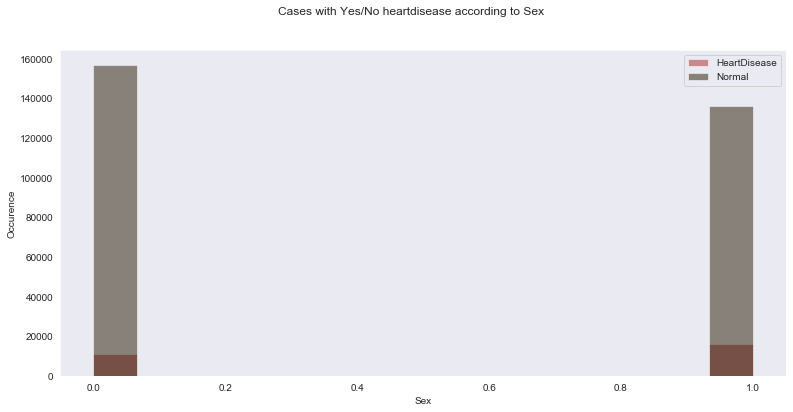

In [24]:
# Histogram Cases of Heart Disease according to sex 
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(df[df["HeartDisease"]==1]["Male"], bins=15, alpha=0.5, color="brown", label="HeartDisease")
ax.hist(df[df["HeartDisease"]==0]["Male"], bins=15, alpha=0.5, color="#271901", label="Normal")

ax.set_xlabel("Sex")
ax.set_ylabel("Occurence")

fig.suptitle("Cases with Yes/No heartdisease according to Sex")

ax.legend();



Smokers suffer the largest of heart disease


Data also shows non-smokers with heart disease issue

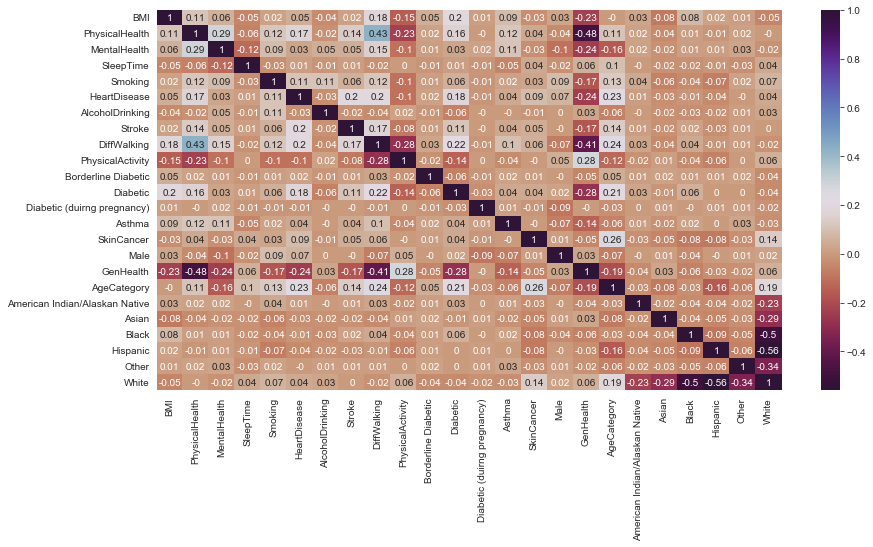

In [25]:
cor= df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(cor, annot = True, cmap = 'twilight_shifted_r')

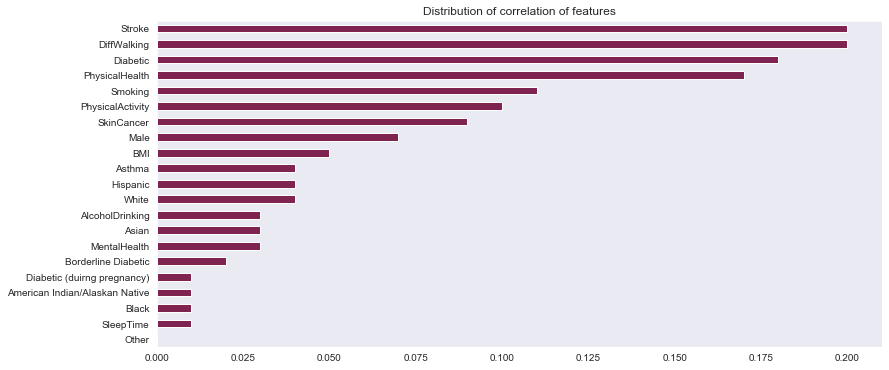

In [26]:
sns.set_style('dark')
sns.set_palette('twilight_shifted_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(cor['HeartDisease']).sort_values()[:-3].plot.barh()
plt.show()

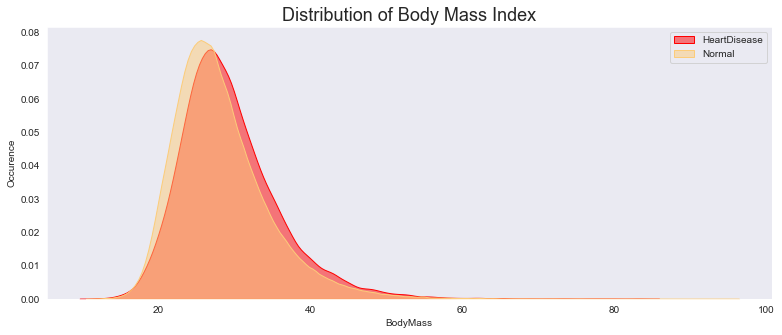

In [27]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Occurence")
ax.legend();
plt.show()

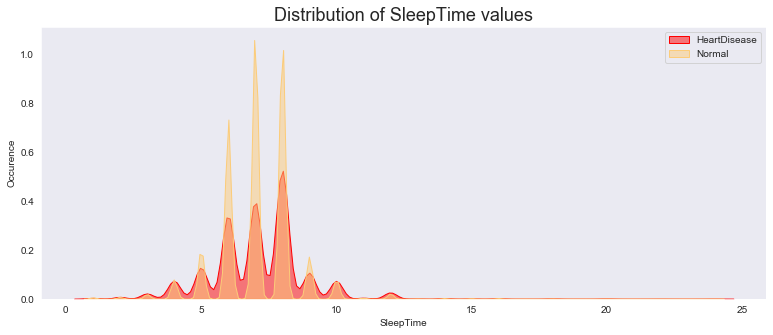

In [28]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["SleepTime"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["SleepTime"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Occurence")
ax.legend();
plt.show()

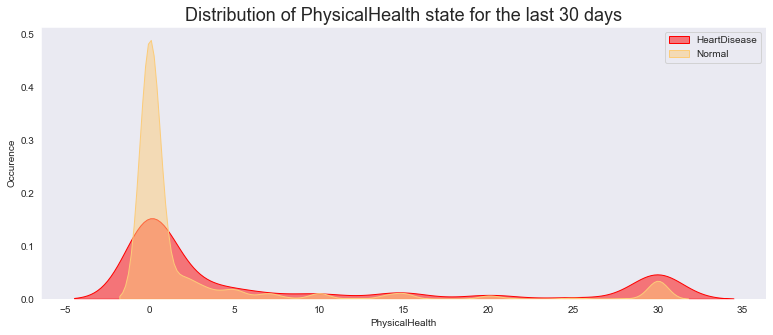

In [29]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,fill = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,fill = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Occurence")
ax.legend();
plt.show()

## Split Data / Train & Test

In [30]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)


In [31]:
target = df['HeartDisease']

In [32]:
# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


In [33]:
scaler = StandardScaler()
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [35]:
X_train


,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Borderline Diabetic,...,SkinCancer,Male,GenHealth,AgeCategory,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
213522,30.90,0.0,0.0,9.0,0,1,0,0,1,0,...,0,0,4,6,0,0,0,0,0,1
124144,29.44,0.0,0.0,6.0,1,1,0,0,0,0,...,0,0,3,9,0,0,0,0,0,1
230019,20.60,0.0,0.0,8.0,0,0,0,0,1,0,...,0,0,5,5,0,0,0,0,0,1
209955,23.11,0.0,11.0,8.0,1,0,1,0,1,0,...,0,1,2,2,0,0,0,0,0,1
165246,35.26,0.0,0.0,7.0,1,0,0,0,0,0,...,0,1,3,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49723,23.63,30.0,0.0,8.0,1,0,0,1,1,0,...,0,1,1,8,0,0,0,0,0,1
156845,22.31,1.0,29.0,7.0,0,0,0,0,1,0,...,0,0,4,2,1,0,0,0,0,0
256753,32.92,0.0,0.0,7.0,1,0,0,0,0,0,...,0,0,2,10,0,0,0,0,0,1
200099,30.41,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,4,5,0,0,0,1,0,0


In [36]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9062524429712785
Precision: 0.3193166885676741
Recall: 0.0892398090341535
F1 Score: 0.13949483352468425
Cohens Kappa Score: 0.1062496525193879
Area Under Curve: 0.6894561236361316
Confusion Matrix:
 [[57477  1036]
 [ 4960   486]]


In [37]:
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8659610062696415
Precision: 0.23522438611346316
Recall: 0.2550495776716856
F1 Score: 0.24473614659501366
Cohens Kappa Score: 0.17132240794050246
Area Under Curve: 0.589041456108272
Confusion Matrix:
 [[53997  4516]
 [ 4057  1389]]


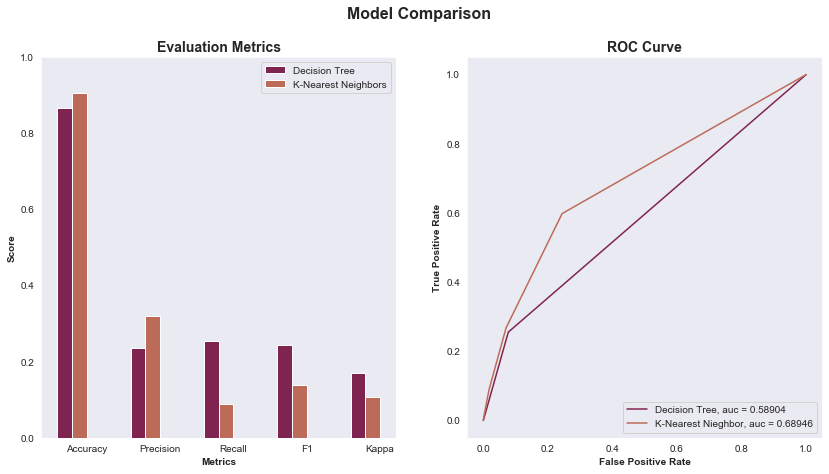

In [38]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [39]:
df.isnull().values.any()

False

In [41]:
# Checking for imbalanced data based on sex.
df['Male'].value_counts()

0    167805
1    151990
Name: Male, dtype: int64

In [42]:
# Checking for any correlations.
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking,HeartDisease,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,...,SkinCancer,Male,GenHealth,AgeCategory,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
BMI,1.000000,0.109788,0.064131,-0.051822,0.023118,0.051803,-0.038816,0.019733,0.181678,-0.150616,...,-0.033644,0.026940,-0.230720,-0.004744,0.026347,-0.078643,0.080672,0.023750,0.012535,-0.049060
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.115352,0.170721,-0.017254,0.137014,0.428373,-0.232283,...,0.041700,-0.040904,-0.482697,0.110763,0.022955,-0.035229,0.011371,-0.005571,0.016102,-0.003968
MentalHealth,0.064131,0.287987,1.000000,-0.119717,0.085157,0.028591,0.051282,0.046467,0.152235,-0.095808,...,-0.033412,-0.100058,-0.241625,-0.155506,0.018394,-0.023113,0.010944,0.011167,0.031385,-0.024489
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,-0.030336,0.008327,-0.005065,0.011900,-0.022216,0.003849,...,0.041266,-0.015704,0.063071,0.104953,-0.003615,-0.019985,-0.020192,-0.013242,-0.031007,0.042905
Smoking,0.023118,0.115352,0.085157,-0.030336,1.000000,0.107764,0.111768,0.061226,0.120074,-0.097174,...,0.033977,0.085052,-0.174717,0.128331,0.035667,-0.060308,-0.038249,-0.066873,0.016205,0.072367
HeartDisease,0.051803,0.170721,0.028591,0.008327,0.107764,1.000000,-0.032080,0.196835,0.201258,-0.100030,...,0.093317,0.070040,-0.243182,0.233432,0.008547,-0.030262,-0.010156,-0.036163,-0.003039,0.040121
AlcoholDrinking,-0.038816,-0.017254,0.051282,-0.005065,0.111768,-0.032080,1.000000,-0.019858,-0.035328,0.017487,...,-0.005702,0.004200,0.029780,-0.059528,-0.004243,-0.022275,-0.025980,-0.015554,0.005455,0.033342
Stroke,0.019733,0.137014,0.046467,0.011900,0.061226,0.196835,-0.019858,1.000000,0.174143,-0.079455,...,0.048116,-0.003091,-0.168090,0.137822,0.014357,-0.016060,0.024819,-0.025823,0.005743,0.001154
DiffWalking,0.181678,0.428373,0.152235,-0.022216,0.120074,0.201258,-0.035328,0.174143,1.000000,-0.278524,...,0.064840,-0.068860,-0.413797,0.243263,0.025205,-0.038830,0.039615,-0.008214,0.008483,-0.015516
PhysicalActivity,-0.150616,-0.232283,-0.095808,0.003849,-0.097174,-0.100030,0.017487,-0.079455,-0.278524,1.000000,...,-0.001328,0.048247,0.281249,-0.121687,-0.017736,0.012106,-0.043701,-0.056564,0.001808,0.064172


##K-Nearest Neighbours

In [43]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [44]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [45]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

334.5579172579839

In [46]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [47]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [48]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[22254  3835]
 [   10 85830]]


In [49]:
print(accuracy_score(y_test,y_pred))

0.9656478660579475


SVM Model

In [ ]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
print(accuracy_score(y_test,y_pred))

Random Forest Model

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)

In [ ]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100)